In [1]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import graphviz
from keras.optimizers import Adam
import keras.backend as K
import datetime

## Neural Network Model with One Feature

### 2017 Model Building with Price Low only

In [22]:
#Buliding NNK Models using low price.
data = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20170817-20171231.csv')
data = data.iloc[::-1].reset_index(drop=True)
data['date'] = pd.to_datetime(data["date"])
data

,date,miner_flow_addresses_count_inflow,miner_flow_addresses_count_outflow,miner_flow_inflow_total,miner_flow_inflow_top10,miner_flow_inflow_mean,miner_flow_inflow_mean_ma7,fees_transaction_mean,fees_transaction_mean_usd,fees_transaction_median,...,thermo_cap,mvrv,stablecoin_supply_ratio,nvm,nvt,puell_index,stock_to_flow,stock_to_flow_reversion,is_shutdown,exchange_whale_ratio_x
0,2017-08-17,3987,2403,8004.318672,2349.945470,1.066105,1.391593,0.001052,4.581560,0.000658,...,2.954226e+09,2.763816,220.920762,0.095377,5.820126,3.897707,7379.956333,0.580527,0,0.219697
1,2017-08-18,4135,2300,4107.221079,2284.398312,1.292799,1.340759,0.001083,4.561803,0.000700,...,2.963505e+09,2.626889,212.672143,0.127778,6.030777,3.172878,8866.853581,0.463957,0,0.191264
2,2017-08-19,3825,2983,3457.309942,1987.847735,1.221233,1.307386,0.000997,4.073275,0.000631,...,2.972295e+09,2.628531,215.610596,0.134456,7.151072,2.984158,8750.411812,0.474978,0,0.169340
3,2017-08-20,3612,6333,2764.898842,1867.240367,1.131764,1.297781,0.000992,4.081948,0.000639,...,2.979838e+09,2.566421,210.825259,0.176329,9.276724,2.545872,10164.939874,0.404828,0,0.310803
4,2017-08-21,3750,2125,3370.221992,2219.958760,1.314439,1.278685,0.001259,5.075372,0.000724,...,2.986838e+09,2.477923,207.290481,0.164630,6.548348,2.350328,11491.801597,0.347493,0,0.157720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2017-12-27,4814,1677,4837.520113,2414.284337,2.497429,2.526838,0.002552,39.848580,0.001463,...,5.278787e+09,2.876259,208.589899,0.242474,7.138070,4.863782,8598.257587,1.798161,0,0.096167
133,2017-12-28,5222,1535,4037.533727,2020.107166,2.113892,2.456491,0.002577,36.672387,0.001469,...,5.316408e+09,2.627514,188.036667,0.239306,8.071841,4.232068,9003.202575,1.572154,0,0.093657
134,2017-12-29,4880,1461,4891.041950,2529.144474,2.552736,2.426344,0.002222,32.248824,0.001266,...,5.357733e+09,2.682072,174.064746,0.201939,7.268989,4.593047,8131.164749,1.787142,0,0.091848
135,2017-12-30,4833,1325,4440.456115,2352.192700,2.456004,2.441103,0.002262,29.830549,0.001208,...,5.392017e+09,2.303271,150.310779,0.206752,7.084316,3.773435,9190.330025,1.364804,0,0.078494


In [23]:
new_data = data[['date', 'price_usd_low']]
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
new_data

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price_usd_low
date,
2017-08-17,4193.047500
2017-08-18,3969.779250
2017-08-19,3932.626667
2017-08-20,4046.913333
2017-08-21,3959.346667
...,...
2017-12-27,14466.897500
2017-12-28,13416.873333
2017-12-29,13907.666667


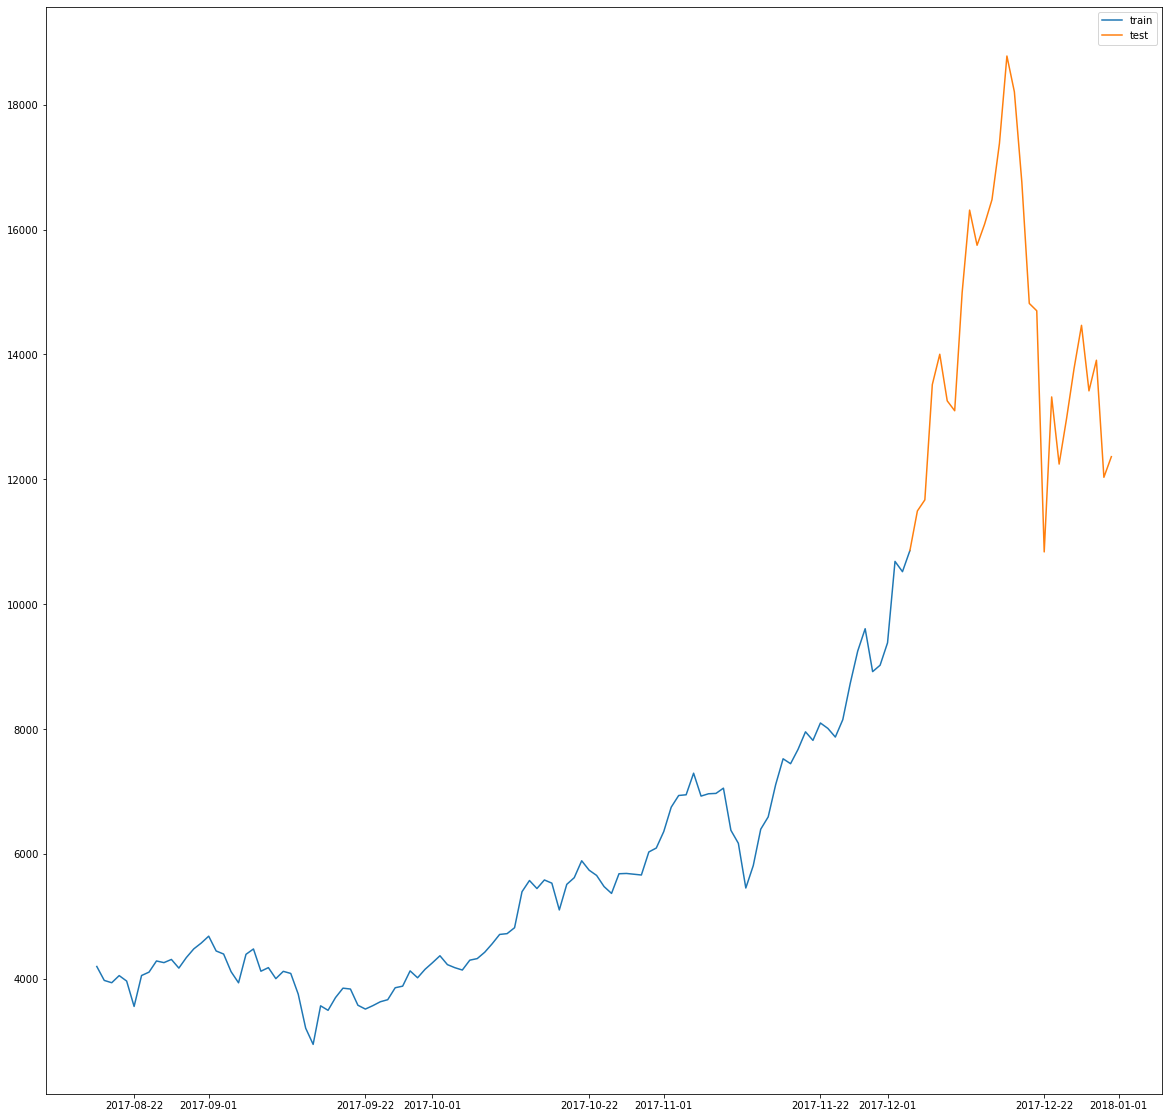

In [24]:
train = new_data[:110]
test = new_data[109:]
plt.figure(figsize=(20, 20))
ax = plt.axes()
# ax.axes.get_xaxis().set_visible(False)
plt.plot(train)
plt.plot(test)
plt.legend(['train', 'test'])
plt.show()

In [25]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
y_scaler = MinMaxScaler()

In [26]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)
X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

In [27]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [28]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = np.reshape(y_pred, (len(y_pred), 1))
y_pred
closing_price = sc.inverse_transform(y_pred)

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
#2 Hidden Layers with 50 neurons each and ReLU activation function
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7/7 [==============================] - 0s 1ms/step - loss: 0.5743
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 0.3149
Epoch 3/20
7/7 [==============================] - 0s 880us/step - loss: 0.1485
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 5/20
7/7 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 6/20
7/7 [==============================] - 0s 933us/step - loss: 0.0066
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 8/20
7/7 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 9/20
7/7 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 10/20
7/7 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 11/20
7/7 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 12/20
7/7 [==============================] - 0s 994us/step - loss: 0.0024
Epoch 13/20
7/7 [==============================] - 0s 3ms/step - lo

<ipython-input-30-fa5c45d91ba5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


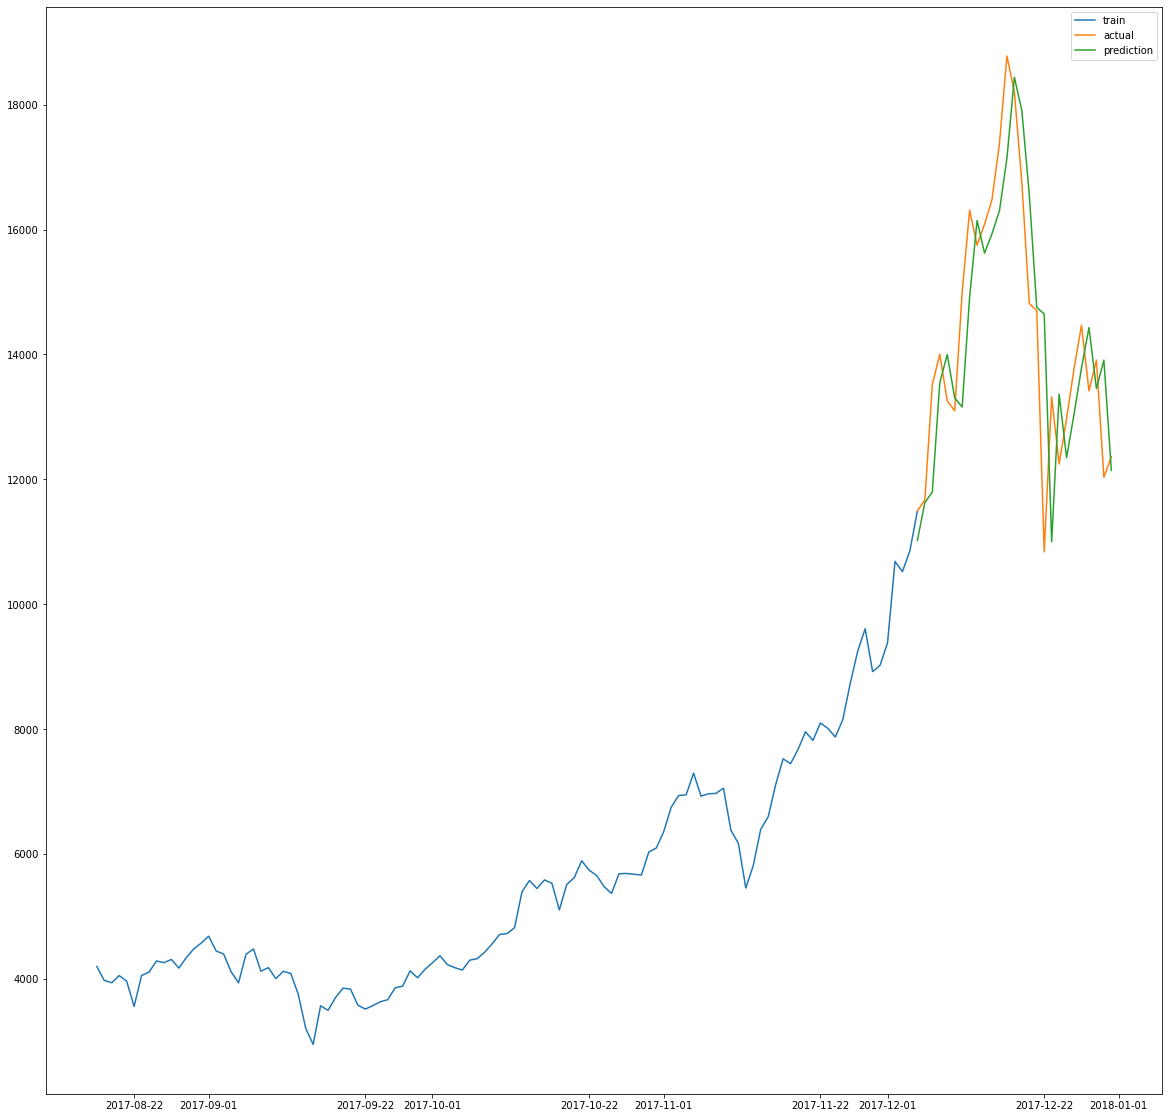

In [30]:
y_pred = model.predict(X_test)
closing_price = sc.inverse_transform(y_pred)#last day of train - valid - 1 (12/30)
plt.figure(figsize=(20, 20))
ax = plt.axes()
# ax.axes.get_xaxis().set_visible(False)
train = new_data[:111]
valid = new_data[110:]
# len(valid)
valid['Predictions'] = closing_price
plt.plot(train['price_usd_low'])
plt.plot(valid[['price_usd_low','Predictions']])
plt.legend(['train', 'actual', 'prediction'])
plt.show()

### 2018 Prediction

In [31]:
data = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20180101-20181231.csv')
data = data.iloc[::-1].reset_index(drop=True)
data['date'] = pd.to_datetime(data["date"])
# data

,date,miner_to_exchange_flow_total,miner_to_exchange_transactions_count_flow,miner_to_exchange_flow_mean,utxo_count,miner_flow_reserve,miner_flow_reserve_usd,exchange_to_exchange_flow_total,exchange_to_exchange_transactions_count_flow,exchange_to_exchange_flow_mean,...,thermo_cap,mvrv,stablecoin_supply_ratio,nvm,nvt,puell_index,stock_to_flow,stock_to_flow_reversion,is_shutdown,exchange_whale_ratio_x
0,2018-06-29,76.555802,47,1.628847,50615523,42389.038468,2.625009e+08,0.164006,1,0.164006,...,8.871723e+09,1.059375,37.029152,0.305165,16.655997,0.664681,9071.627044,0.682640,0,0.082296
1,2018-06-30,48.024498,37,1.297959,50471897,41998.771537,2.688855e+08,0.000000,0,0.000000,...,8.883088e+09,1.095190,38.177541,0.339555,23.370946,0.666984,9716.004852,0.658936,0,0.093266
2,2018-07-01,27.804583,43,0.646618,50438922,42039.187540,2.669679e+08,0.000000,0,0.000000,...,8.894869e+09,1.088588,37.930487,0.464523,19.985861,0.690742,9320.433226,0.681347,0,0.222855
3,2018-07-02,56.966647,50,1.139333,50350653,41374.919907,2.737918e+08,0.000000,0,0.000000,...,8.906387e+09,1.134286,39.472382,0.278132,17.595810,0.674730,9718.047402,0.680933,0,0.110665
4,2018-07-03,111.830546,43,2.600710,50284977,41585.059765,2.703880e+08,0.000000,0,0.000000,...,8.916137e+09,1.114822,38.809592,0.256334,15.905272,0.570787,11813.454176,0.550393,0,0.142673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2018-12-27,7.408962,36,0.205805,49609504,44364.932215,1.601907e+08,51.781786,16,3.236362,...,1.088203e+10,0.670007,24.635860,0.165224,13.379473,0.533892,8021.911975,0.450111,0,0.113576
182,2018-12-28,18.960624,42,0.451443,49625582,43958.526259,1.716080e+08,120.846066,19,6.360319,...,1.088990e+10,0.725587,26.758952,0.166989,14.496593,0.515393,8359.159782,0.467016,0,0.124737
183,2018-12-29,16.390634,41,0.399772,49630314,43842.918975,1.687093e+08,41.093789,12,3.424482,...,1.089669e+10,0.716293,25.683566,0.201894,15.204214,0.447304,10116.794809,0.380362,0,0.173039
184,2018-12-30,10.970959,37,0.296512,49634765,44408.731989,1.712335e+08,50.604055,7,7.229151,...,1.090515e+10,0.718240,26.313478,0.235405,25.262168,0.560353,7933.486839,0.486022,0,0.166953


In [32]:
new_data = data[['date', 'price_usd_low']]
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
# new_data

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price_usd_low
date,
2018-06-29,5784.427500
2018-06-30,6189.845000
2018-07-01,6255.617500
2018-07-02,6274.982500
2018-07-03,6466.696667
...,...
2018-12-27,3589.402500
2018-12-28,3581.500000
2018-12-29,3731.750000


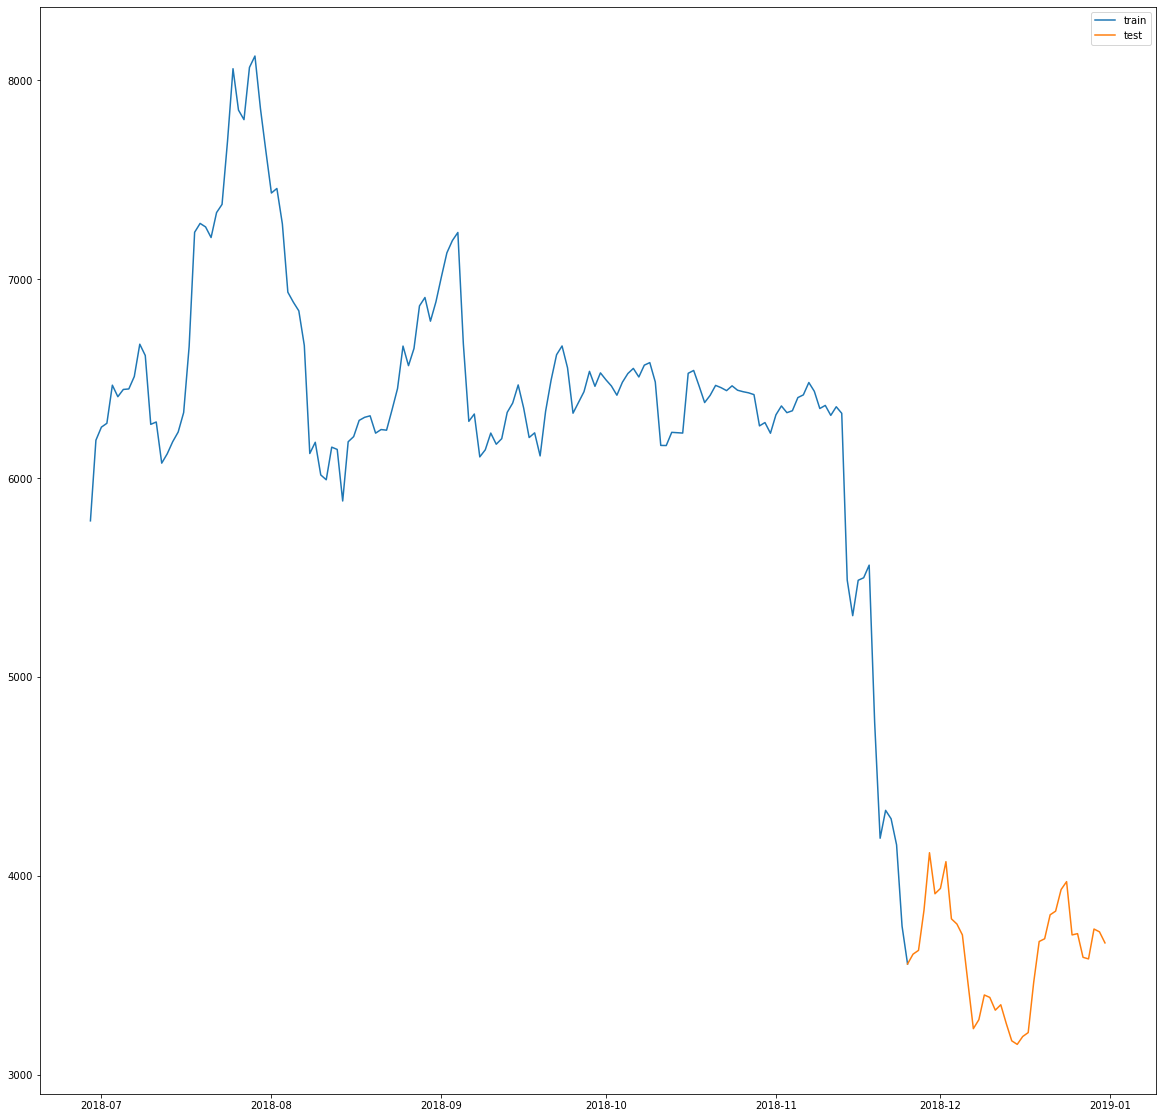

In [33]:
train = new_data[:150]
test = new_data[149:]
plt.figure(figsize=(20, 20))
ax = plt.axes()
# ax.axes.get_xaxis().set_visible(False)
plt.plot(train)
plt.plot(test)
plt.legend(['train', 'test'])
plt.show()

In [34]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
y_scaler = MinMaxScaler()

In [35]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)
X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

<ipython-input-36-c44cc316818e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


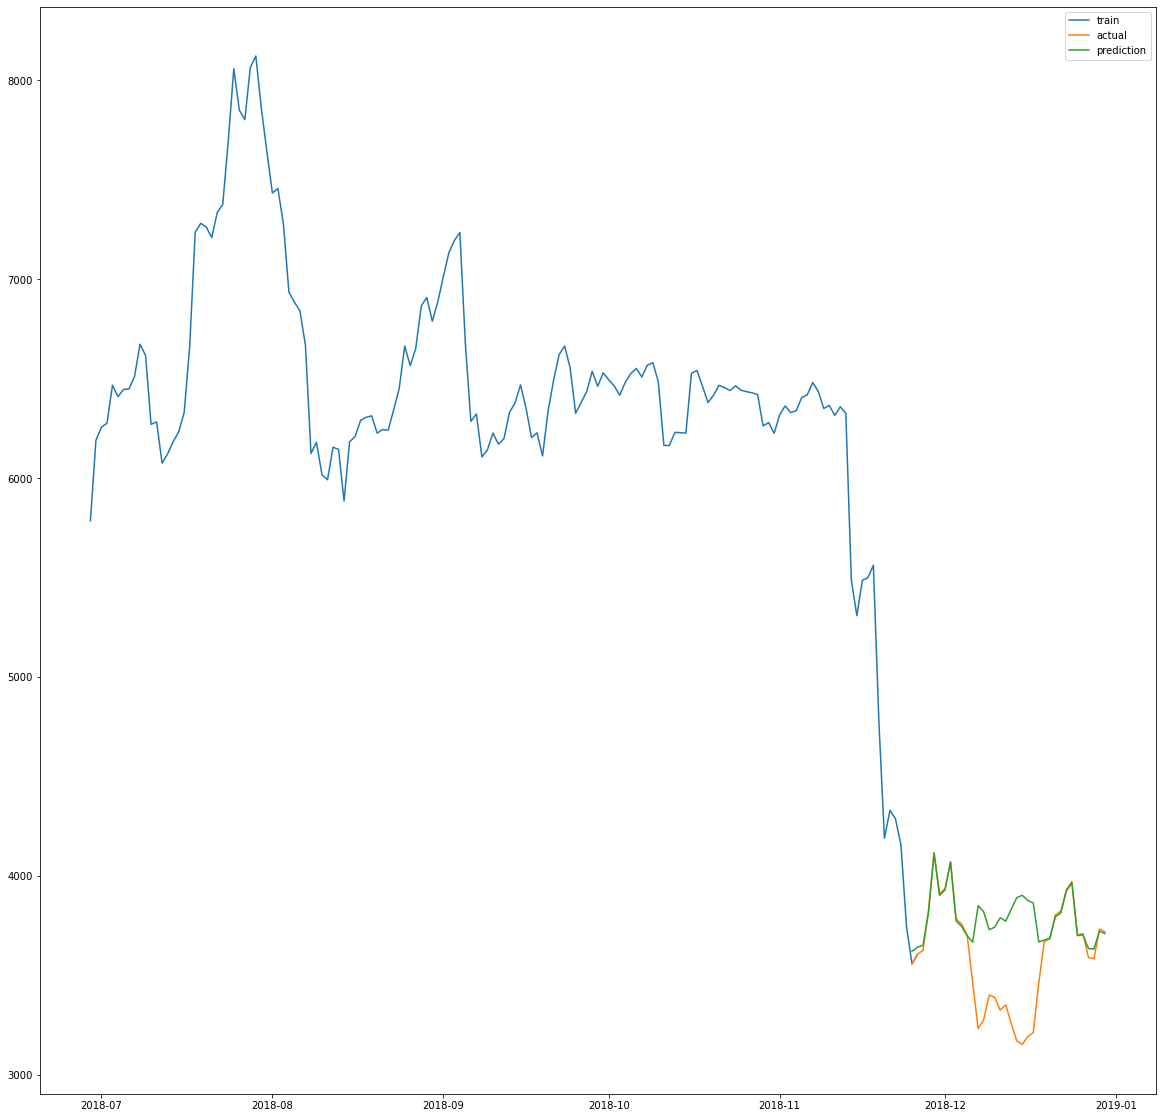

In [36]:
y_pred = model.predict(X_test)
closing_price = sc.inverse_transform(y_pred)
plt.figure(figsize=(20, 20))
ax = plt.axes()
# ax.axes.get_xaxis().set_visible(False)
train = new_data[:151]
valid = new_data[149:-1]
# len(valid)
valid['Predictions'] = closing_price
plt.plot(train['price_usd_low'])
plt.plot(valid[['price_usd_low','Predictions']])
plt.legend(['train', 'actual', 'prediction'])
plt.show()

### 2019 Prediction

In [37]:
data = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20190101-20200229.csv')
data = data.iloc[::-1].reset_index(drop=True)
data['date'] = pd.to_datetime(data["date"])
# data

,date,exchange_to_miner_flow_total,exchange_to_miner_transactions_count_flow,exchange_to_miner_flow_mean,miner_flow_outflow_total,miner_flow_outflow_top10,miner_flow_outflow_mean,miner_flow_outflow_mean_ma7,transactions_count_total,transactions_count_mean,...,thermo_cap,mvrv,stablecoin_supply_ratio,nvm,nvt,puell_index,stock_to_flow,stock_to_flow_reversion,is_shutdown,exchange_whale_ratio_x
0,2019-01-01,4.226458,23,0.183759,1832.373576,1700.878378,5.835585,6.672818,234576,1574.335570,...,1.091958e+10,0.716268,26.202132,0.363914,32.675540,0.468773,9373.138816,0.409607,0,0.242196
1,2019-01-02,4.995024,28,0.178394,4014.600940,3429.632920,9.767886,6.770280,271545,1798.311258,...,1.092693e+10,0.733382,26.565198,0.199432,18.066720,0.494410,9249.991282,0.424895,0,0.133410
2,2019-01-03,6.049401,35,0.172840,2671.026875,2046.351841,6.436209,6.767566,290861,1876.522581,...,1.093447e+10,0.713996,25.771752,0.184049,18.420834,0.510291,9012.281830,0.424235,0,0.149571
3,2019-01-04,20.809684,30,0.693656,3352.986728,2862.212693,7.889381,6.724688,281623,1890.087248,...,1.094165e+10,0.720906,25.831233,0.194256,18.190770,0.488828,9376.192507,0.411533,0,0.134711
4,2019-01-05,1.229299,22,0.055877,4551.152664,4291.910282,12.503167,7.665343,265029,1625.944785,...,1.094958e+10,0.714252,25.674176,0.256357,22.718283,0.542656,8571.875359,0.445923,0,0.158577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2020-02-25,191.426369,45,4.253919,2183.969153,1928.941619,4.224312,5.516948,334449,2322.562500,...,1.703143e+10,1.337833,34.021354,0.312956,20.553999,1.101700,10131.893849,0.919419,0,0.195753
421,2020-02-26,4.494386,46,0.097704,2733.726865,2521.475153,5.297920,5.365795,329831,2425.227941,...,1.704702e+10,1.263788,32.138198,0.268182,20.256928,0.990601,10728.887605,0.819716,0,0.112691
422,2020-02-27,4.760194,35,0.136006,2174.407792,2017.982015,4.322878,5.280412,339258,2307.877551,...,1.706343e+10,1.267760,32.243025,0.268255,18.507771,1.041060,9927.045675,0.888121,0,0.108176
423,2020-02-28,75.235993,34,2.212823,2381.245659,2165.993334,4.501410,4.958577,368432,2331.848101,...,1.708084e+10,1.253047,31.747179,0.249762,18.006392,1.102155,9236.922242,0.943190,0,0.164428


In [38]:
new_data = data[['date', 'price_usd_low']]
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
# new_data

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


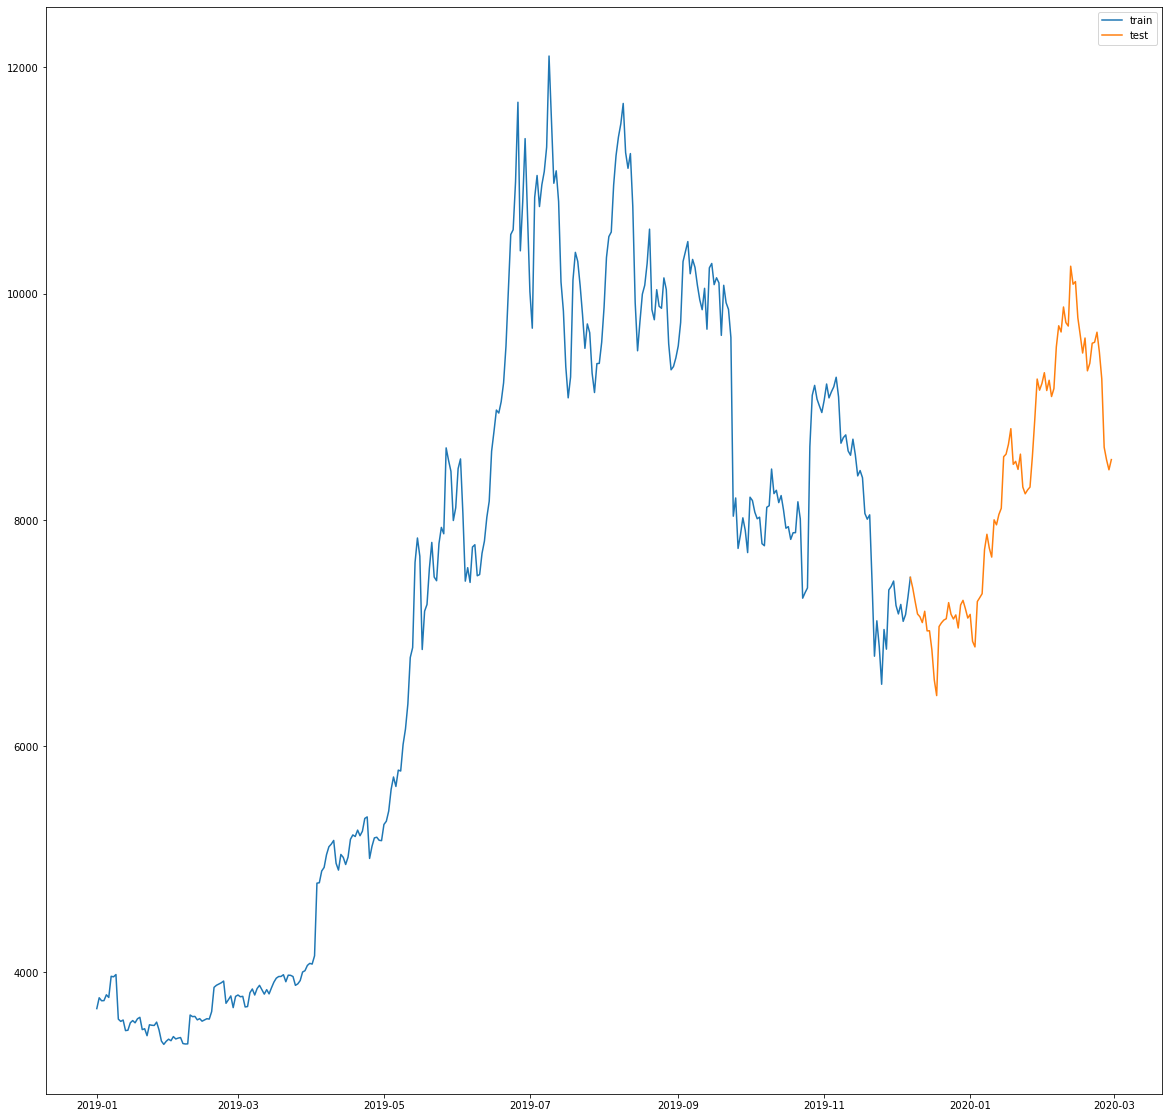

In [39]:
train = new_data[:341]
test = new_data[340:]
plt.figure(figsize=(20, 20))
ax = plt.axes()
# ax.axes.get_xaxis().set_visible(False)
plt.plot(train)
plt.plot(test)
plt.legend(['train', 'test'])
plt.show()

In [40]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
y_scaler = MinMaxScaler()

In [41]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)
X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

<ipython-input-42-7bc31c2931a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


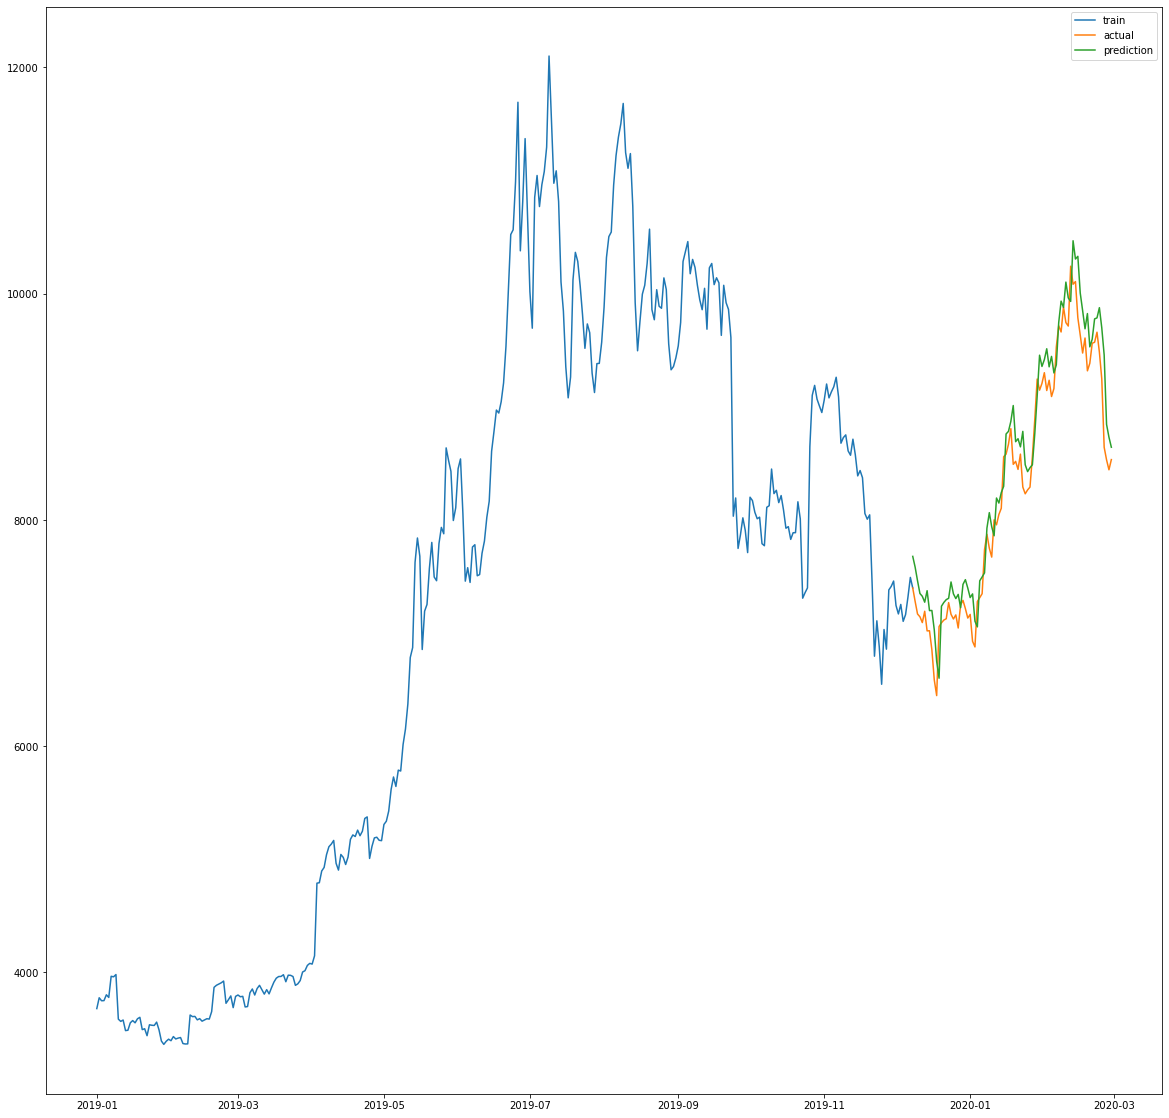

In [42]:
y_pred = model.predict(X_test)
closing_price = sc.inverse_transform(y_pred)
plt.figure(figsize=(20, 20))
ax = plt.axes()
# ax.axes.get_xaxis().set_visible(False)
train = new_data[:342]
valid = new_data[341:]
# len(valid)
valid['Predictions'] = closing_price
plt.plot(train['price_usd_low'])
plt.plot(valid[['price_usd_low','Predictions']])
plt.legend(['train', 'actual', 'prediction'])
plt.show()

### 2020 Prediction

In [43]:
data = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20200301-20200820.csv')
data = data.iloc[::-1].reset_index(drop=True)
data['date'] = pd.to_datetime(data["date"])
# data

In [44]:
new_data = data[['date', 'price_usd_low']]
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
# new_data

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


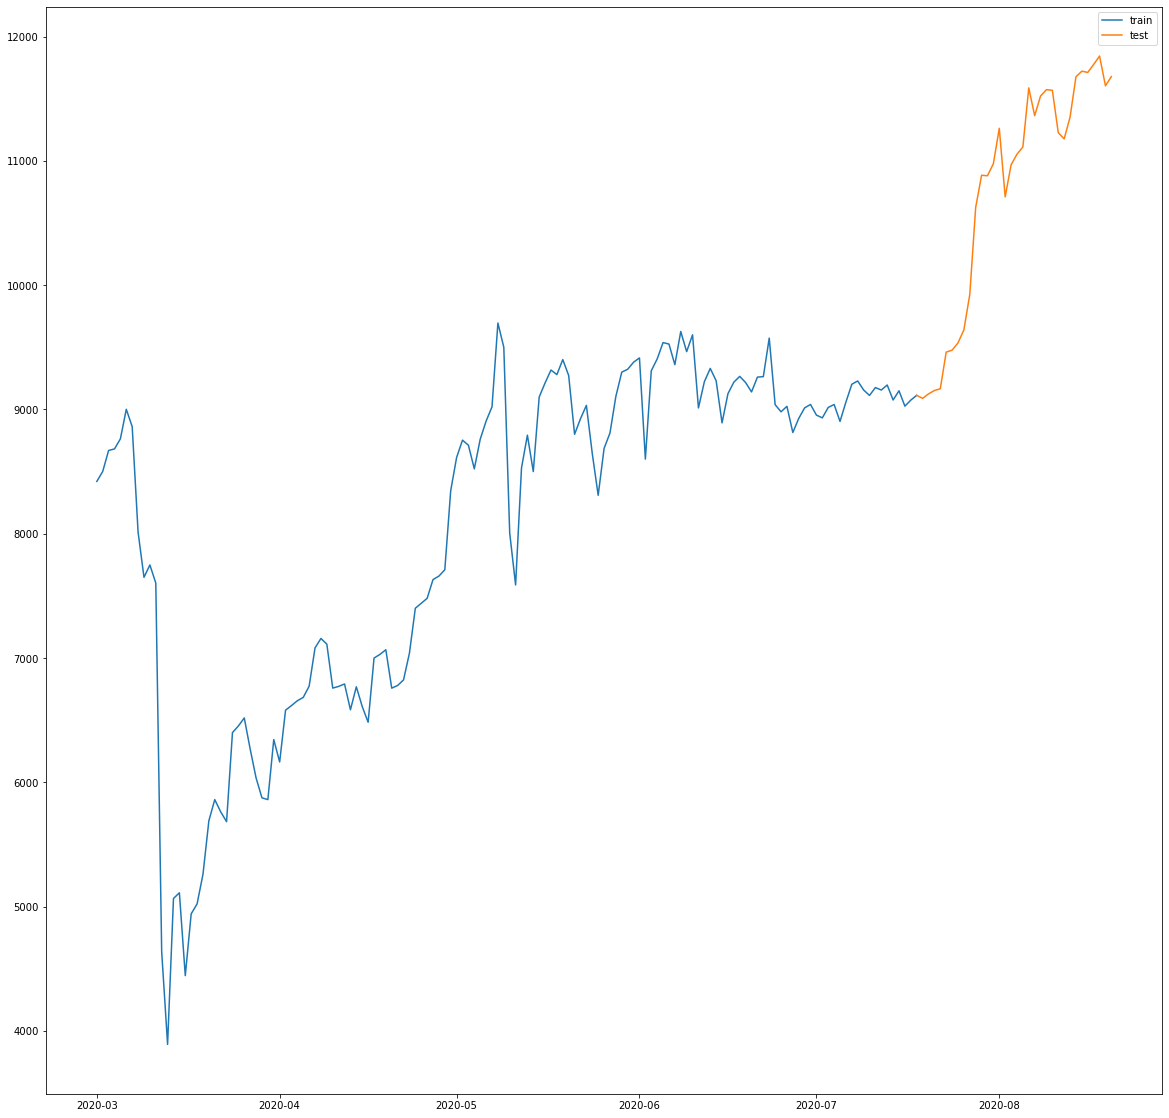

In [45]:
train = new_data[:140]
test = new_data[139:]
plt.figure(figsize=(20, 20))
ax = plt.axes()
# ax.axes.get_xaxis().set_visible(False)
plt.plot(train)
plt.plot(test)
plt.legend(['train', 'test'])
plt.show()

In [46]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
y_scaler = MinMaxScaler()

In [47]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)
X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

<ipython-input-48-3fdb9ba38b19>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


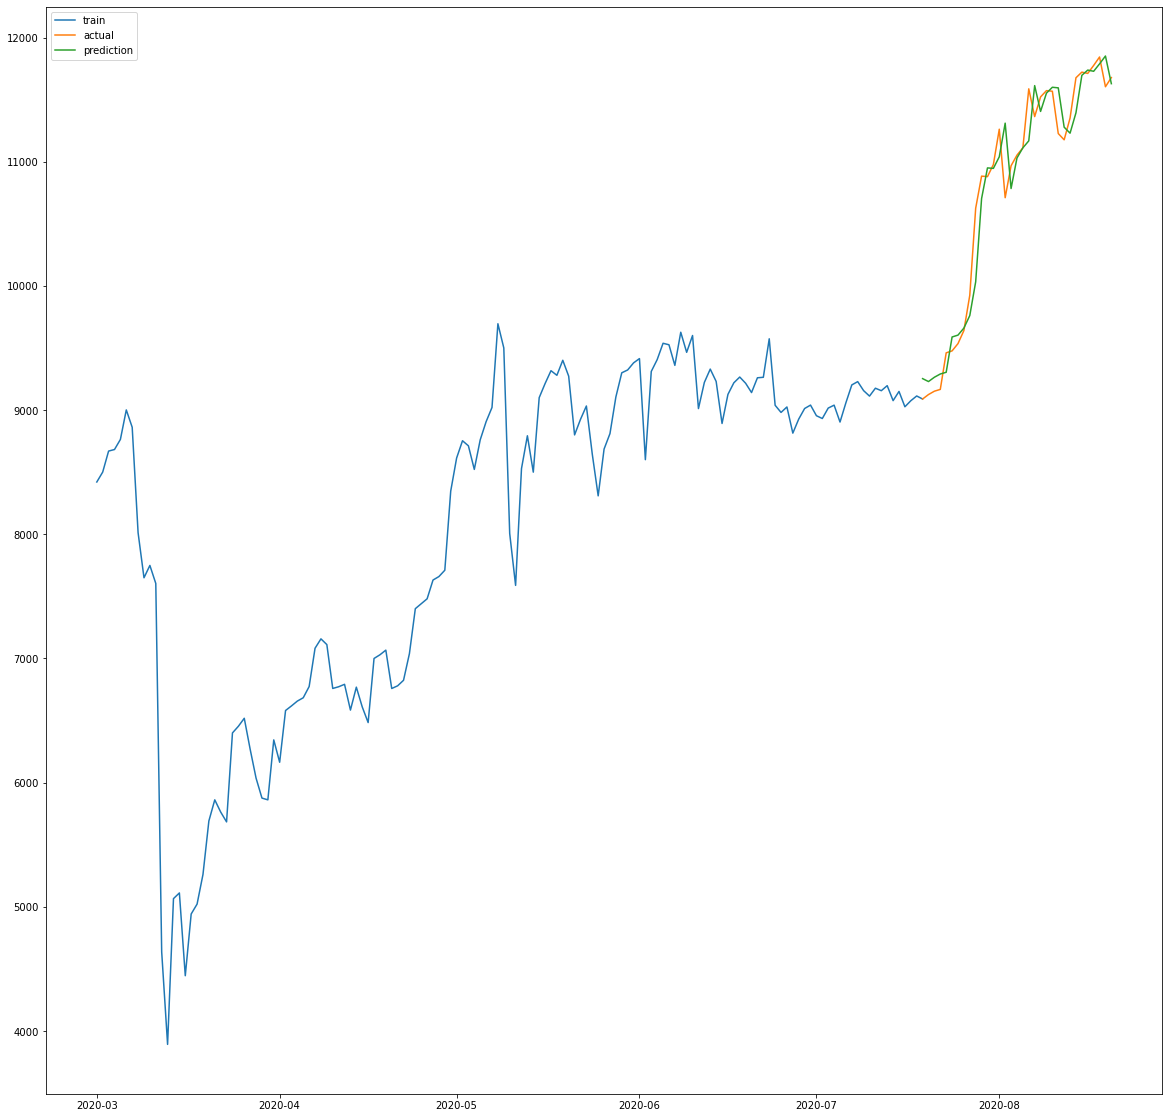

In [48]:
y_pred = model.predict(X_test)
closing_price = sc.inverse_transform(y_pred) #last day of train - valid - 1(8/19)
plt.figure(figsize=(20, 20))
ax = plt.axes()
# ax.axes.get_xaxis().set_visible(False)
train = new_data[:141]
valid = new_data[140:]
# len(valid)
valid['Predictions'] = closing_price
plt.plot(train['price_usd_low'])
plt.plot(valid[['price_usd_low','Predictions']])
plt.legend(['train', 'actual', 'prediction'])
plt.show()

### 60 days ago data to predict --2020-08-20

In [49]:
data_20 = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20200301-20200820.csv')
data_20 = data_20.iloc[::-1].reset_index(drop=True)
data_20['date'] = pd.to_datetime(data_20["date"])
new_data_20 = data_20[['date', 'price_usd_low']]
new_data_20.index = new_data_20.date
new_data_20.drop('date', axis=1, inplace=True)
# new_data_20

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
data_19 = pd.read_csv('/Users/rachelzhu/Redblock/CrypotQuant_BTC_20190101-20200229.csv')
data_19 = data_19.iloc[::-1].reset_index(drop=True)
data_19['date'] = pd.to_datetime(data_19["date"])
new_data_19 = data_19[['date', 'price_usd_low']]
new_data_19.index = new_data_19.date
new_data_19.drop('date', axis=1, inplace=True)
new_data_19

In [51]:
new = new_data_19.append(new_data_20)

In [52]:
sc = MinMaxScaler()
test_sc_new = sc.fit_transform(new)
y_scaler = MinMaxScaler()

In [53]:
test_sc_df_new = pd.DataFrame(test_sc_new, columns=['Y'], index=new.index)

for s in range(1,2):
    test_sc_df_new['X_{}'.format(s)] = test_sc_df_new['Y'].shift(s)
    
X_test_new = test_sc_df_new.dropna().drop('Y', axis=1)
y_test_new = test_sc_df_new.dropna().drop('X_1', axis=1)

In [54]:
dpm = pd.period_range('2020/02/29', freq='D', periods=219)
p = []
for i in dpm:
    df = X_test_new.copy()
    time = pd.Timestamp(str(i))
    d = datetime.timedelta(days = 60)# 60 days ago to predict 
    a = time - d
    df = df[a : time] #x_test
    yp = model.predict(df)
    cp = sc.inverse_transform(yp)
    p.append(float(cp[-1])) #predictions
# df

,X_1
date,
2020-08-05,0.880114
2020-08-06,0.886821
2020-08-07,0.941223
2020-08-08,0.915629
2020-08-09,0.933792
2020-08-10,0.939589
2020-08-11,0.939007
2020-08-12,0.900006
2020-08-13,0.894228


<ipython-input-56-1e449128c37f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = p[:174]


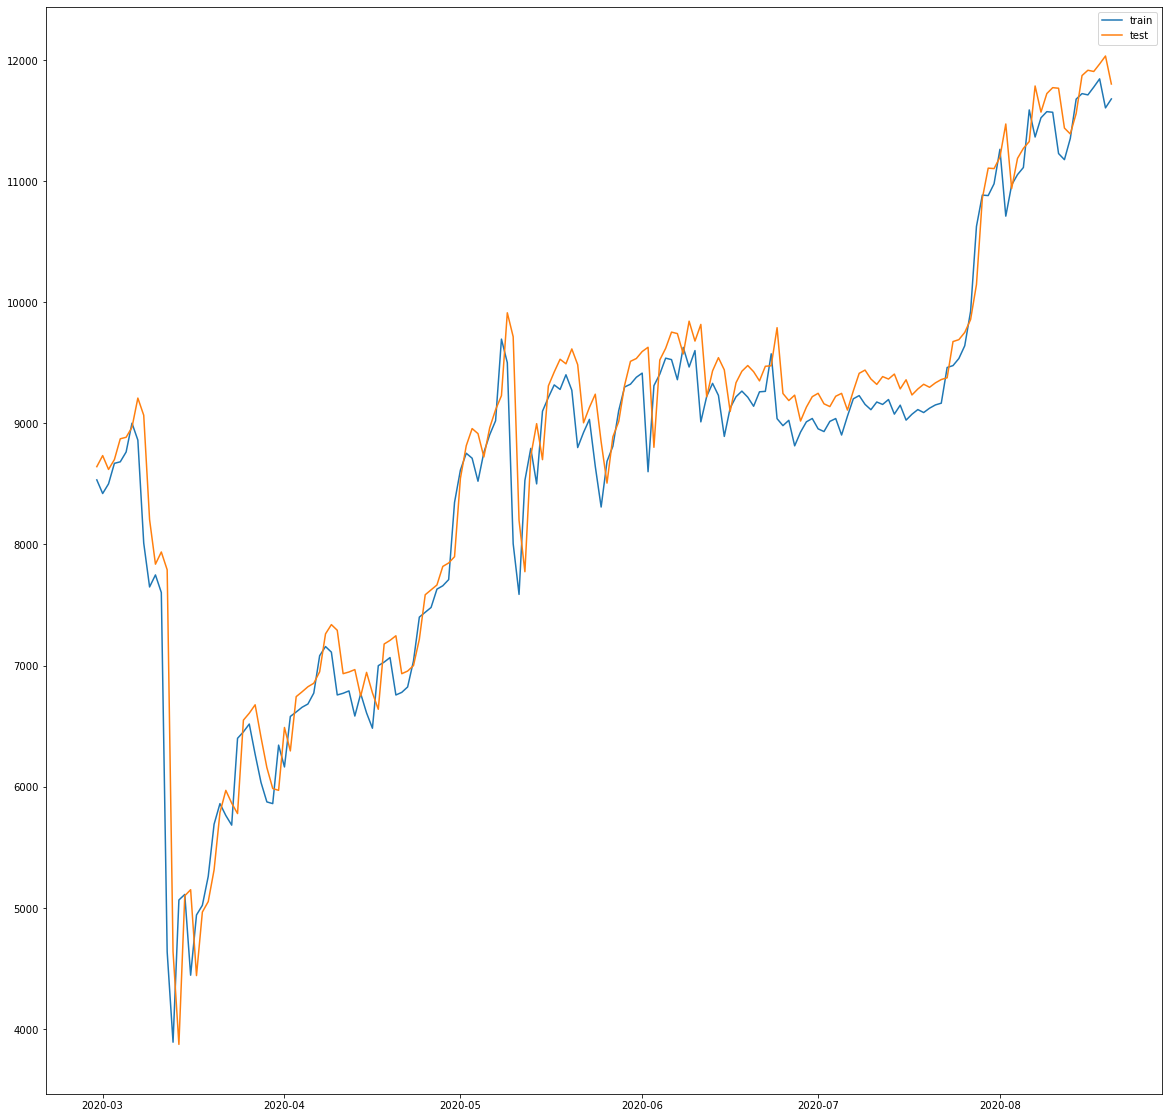

In [56]:
plt.figure(figsize=(20, 20))
ax = plt.axes()
t = pd.Timestamp('2020/02/29')
# plt.plot(p)
test = new.loc[t:]
test['Predictions'] = p[:174]
test
plt.plot(test)
plt.legend(['train', 'test'])
plt.show()

### Predictions to 2020-10-04

In [57]:
data_td = pd.read_csv('/Users/rachelzhu/Redblock/market_low.csv')
data_td = data_td.iloc[::-1].reset_index(drop=True)
data_td['date'] = pd.to_datetime(data_td["date"])
new_data_td = data_td[['date', 'price_usd_low']]
new_data_td.index = new_data_td.date
new_data_td.drop('date', axis=1, inplace=True)
time1 = pd.Timestamp('2020/08/20')

/Users/rachelzhu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
time1 = pd.Timestamp('2020/06/26')
new_td = new[:time1].append(new_data_td)

In [59]:
sc = MinMaxScaler()
test_sc_new_td = sc.fit_transform(new_td)
y_scaler = MinMaxScaler()

In [60]:
test_sc_df_new_td = pd.DataFrame(test_sc_new_td, columns=['Y'], index=new_td.index)

for s in range(1,2):
    test_sc_df_new_td['X_{}'.format(s)] = test_sc_df_new_td['Y'].shift(s)
    
X_test_new_td = test_sc_df_new_td.dropna().drop('Y', axis=1)
y_test_new_td = test_sc_df_new_td.dropna().drop('X_1', axis=1)

In [61]:
dpm = pd.period_range('2020/08/20', freq='D', periods=46)
p = []
for i in dpm:
    df = X_test_new_td.copy()
    time = pd.Timestamp(str(i))
    d = datetime.timedelta(days = 60)# 60 days ago to predict 
    a = time - d
    df = df[a : time] #x_test
    yp = model.predict(df)
    cp = sc.inverse_transform(yp)
    p.append(float(cp[-1])) #predictions
# df

<ipython-input-67-edbf6c37405b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = p


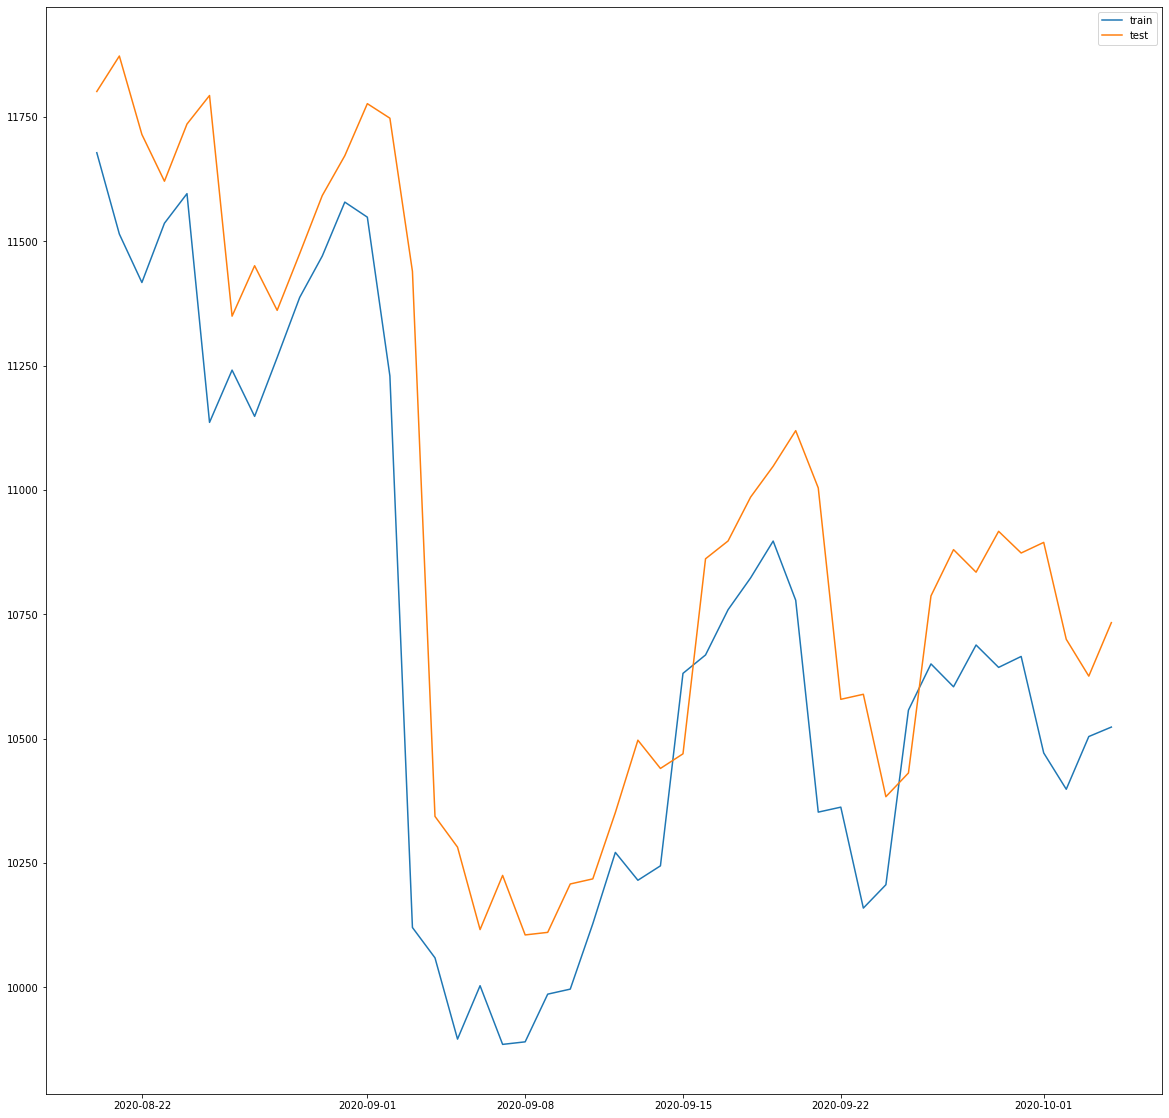

In [67]:
plt.figure(figsize=(20, 20))
ax = plt.axes()
t = '2020/08/20'
test = new_data_td[t:]
test['Predictions'] = p
test
plt.plot(test)
plt.legend(['train', 'test'])
plt.show()

In [68]:
#average difference.
a = []
for i in range(len(test)):
    a.append(test.iloc[i][1] - test.iloc[i][0])
sum(a)/len(a)

241.89082992152169

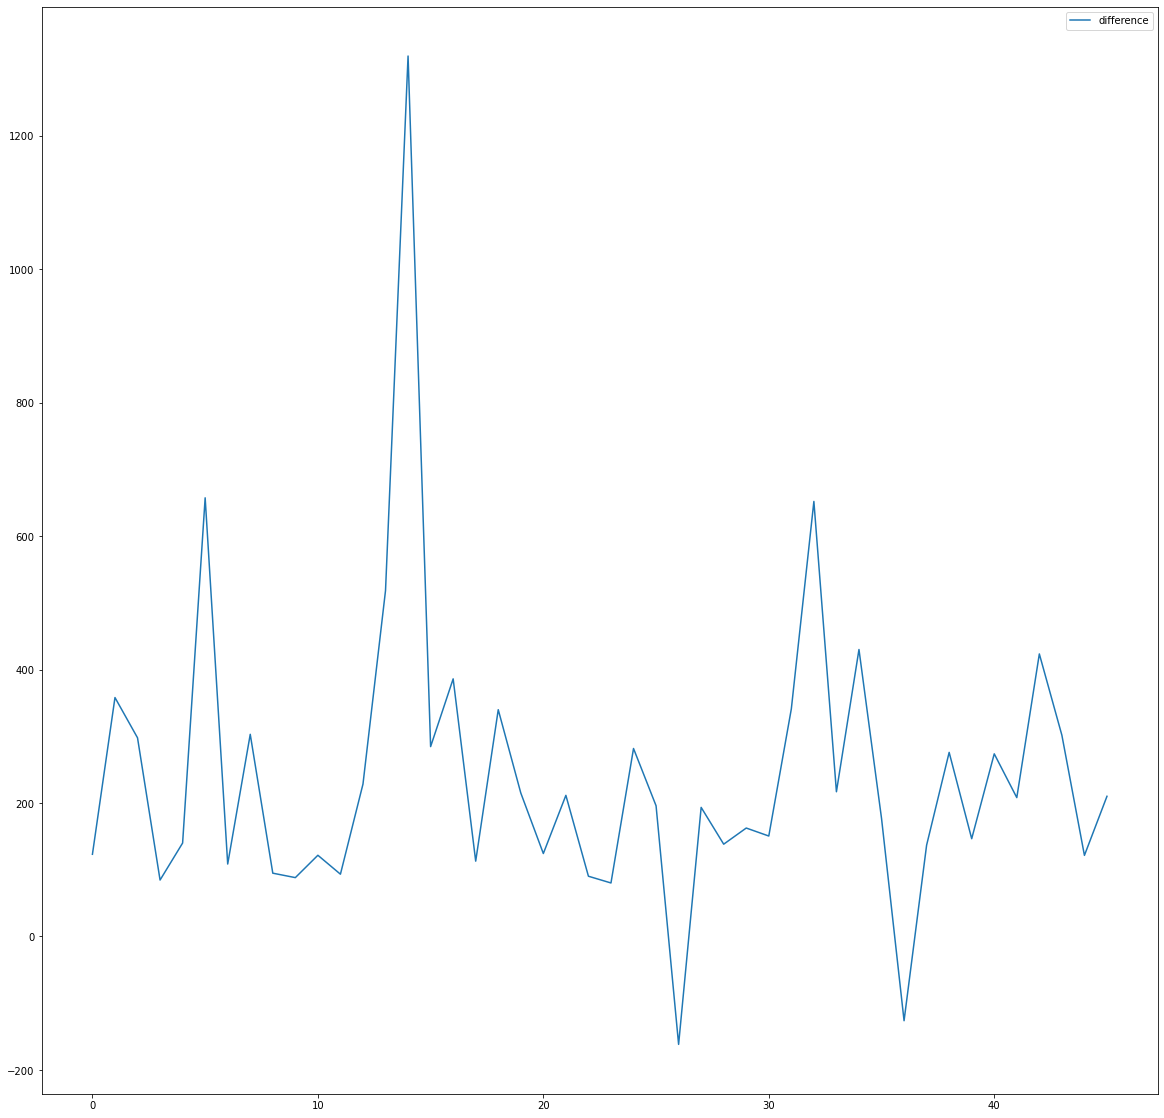

In [69]:
#plot difference.
plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.plot(a)
plt.legend(['difference'])
plt.show()